# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [136]:
from scipy import misc, ndimage
import numpy as np
import matplotlib.pyplot as plt

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

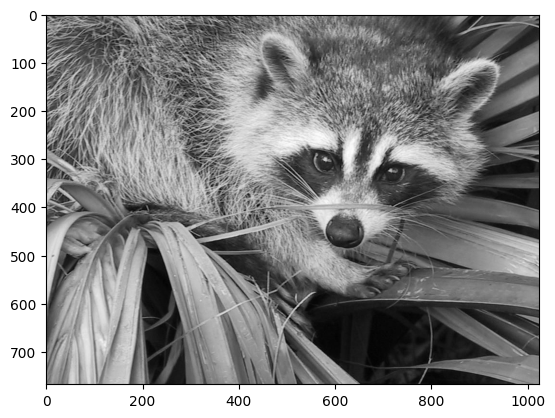

In [137]:
X = misc.face(gray=True)
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata Fourier a unei imagini

Transformata Fourier Discretă se extinde ușor la mai multe dimensiuni. Pentru un semnal bidimensional precum o imagine DFT devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}e^{-j2\pi(m_1 n_1/N_1 + m_2 n_2/N_2)}
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric
* proprietățile transformatei DFT 1D sunt respectate și în cazul celei 2D

În continuare vom folosi rutina generală `fft2` ce servește mai bine activității de învățare, deși pentru semnale reale ar trebui să folosim `rfft2` ce întoarce doar informația esențială (ex. omite simetriile). De asemenea vom analiza spectrul în scală logaritmică pentru a diferenția mai bine magnitudinile bin-urilor DTF.

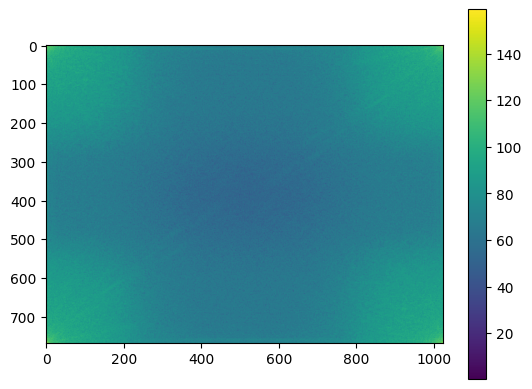

In [138]:
Y = np.fft.fft2(X)
freq_db = 20*np.log10(abs(Y))

plt.imshow(freq_db)
plt.colorbar()
plt.show()


Operațiile efectuate direct asupra imaginii se reflectă și în spectrul acesteia. Iată un exemplu a unei rotații de 45 de grade:

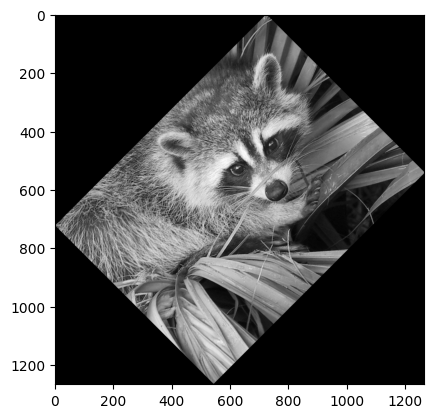

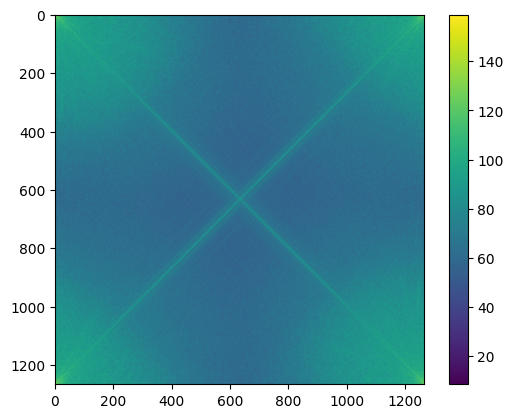

In [139]:
rotate_angle = 45
X45 = ndimage.rotate(X, rotate_angle)
plt.imshow(X45, cmap=plt.cm.gray)
plt.show()

Y45 = np.fft.fft2(X45)
plt.imshow(20*np.log10(abs(Y45)))
plt.colorbar()
plt.show()

Momentan pe axe sunt afișate numărul bin-urilor. Pentru a obține frecvențele asociate folosiți `fftfreq`:

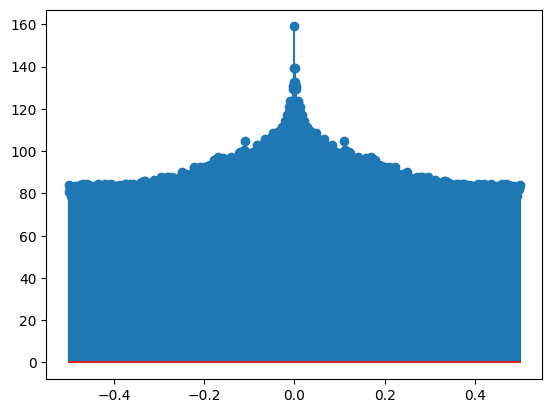

In [140]:
freq_x = np.fft.fftfreq(X.shape[1])
freq_y = np.fft.fftfreq(X.shape[0])

plt.stem(freq_x, freq_db[:][0])
plt.show()

# Atenuarea frecvențelor înalte

Pentru a anula frecvențele de peste un anumit prag `freq_cutoff` putem pur și simplu anula intrările din spectru și aplica transformata Fourier inversă:

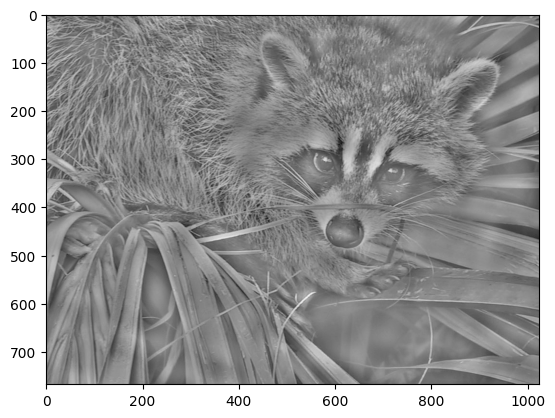

In [141]:
freq_cutoff = 120

Y_cutoff = Y.copy()
Y_cutoff[freq_db > freq_cutoff] = 0
X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
                                # in practice use irfft2
plt.imshow(X_cutoff, cmap=plt.cm.gray)
plt.show()

# Zgomot

Zgomotul alb perturbă în mod egal spectrul semnalului. Este astfel egal distribuit și regăsit în toate bin-urile DFT. [Zgomotul color](https://en.wikipedia.org/wiki/Colors_of_noise) se schimbă de-a lungul frecvențelor.

Putem adăuga zgomot în limita a `pixel_noise` pixeli imaginii folosind `random.randint`:

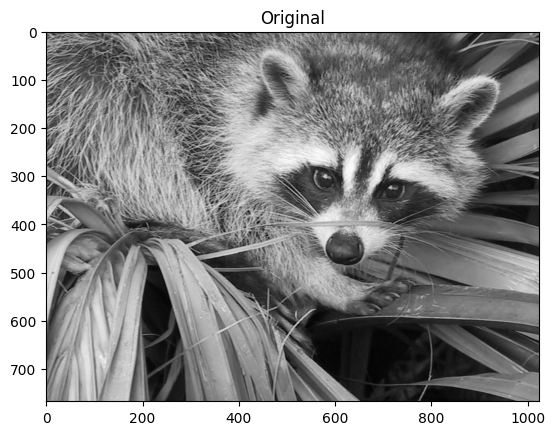

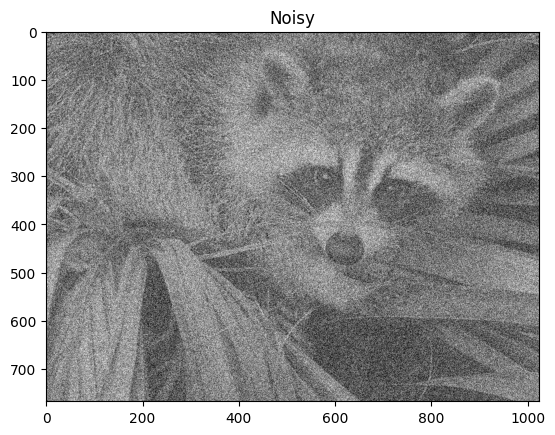

In [142]:
pixel_noise = 200

noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise
plt.imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.show()
plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.title('Noisy')
plt.show()

# Sarcini

1. Produceți imaginile și spectrul pentru funcțiile de mai jos și dați o explicație scurtă pentru fiecare rezultat.
* $x_{n_1,n_2} = \sin(2\pi n_1 + 3\pi n_2)$
* $x_{n_1,n_2} = \sin(4\pi n_1) + \cos(6\pi n_2)$
* $Y_{0,5} = Y_{0,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,0} = Y_{N-5,0} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,5} = Y_{N-5,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

*Atenție*: $x$ reprezintă informație în domeniul timpului, $Y$ în domeninul frecvenței.


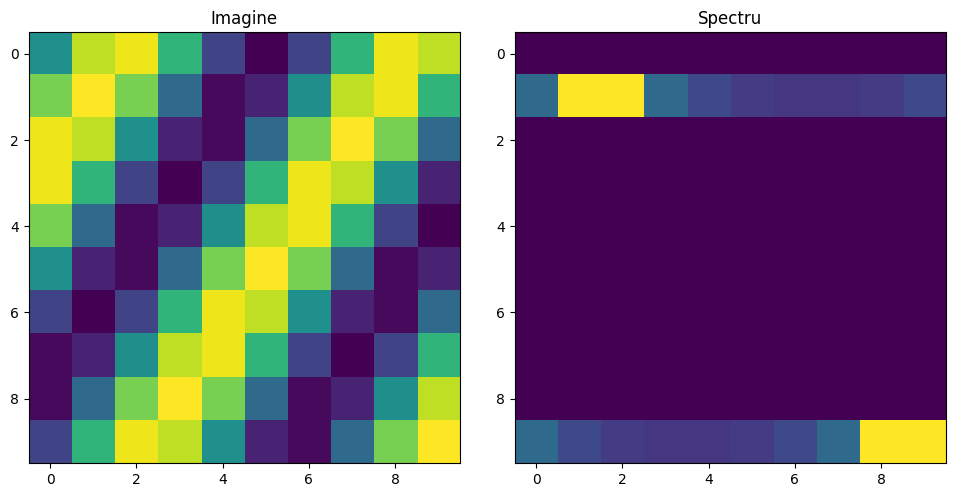

In [143]:
dim = 10

x = np.zeros((dim,dim))
for n1 in range(dim):
    for n2 in range(dim):
        x[n1][n2] = np.sin(2*np.pi*n1/dim + 3*np.pi*n2/dim)
 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Imagine')
plt.imshow(x)

spectru = np.fft.fft2(x)
plt.subplot(1,2,2)
plt.title('Spectru')
plt.imshow(np.abs(spectru))
plt.tight_layout(pad = 2)
plt.savefig("grafice/ex1_a.pdf", format="pdf")
plt.savefig("grafice/ex1_a.png", format="png")
plt.show()


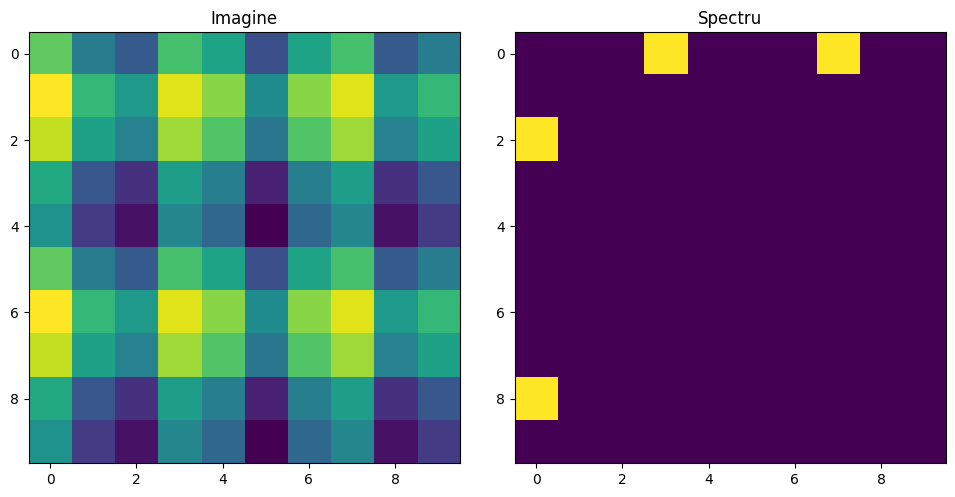

In [144]:
dim = 10
x = np.zeros((dim,dim))
for n1 in range(dim):
    for n2 in range(dim):
        x[n1][n2] = np.sin(4*np.pi*n1/dim) + np.cos(6*np.pi*n2/dim)
 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Imagine')
plt.imshow(x)

plt.subplot(1,2,2)
plt.title('Spectru')
spectru = np.fft.fft2(x)
plt.imshow(np.abs(spectru))

plt.tight_layout(pad = 2)
plt.savefig("grafice/ex1_b.pdf", format="pdf")
plt.savefig("grafice/ex1_b.png", format="png")
plt.show()

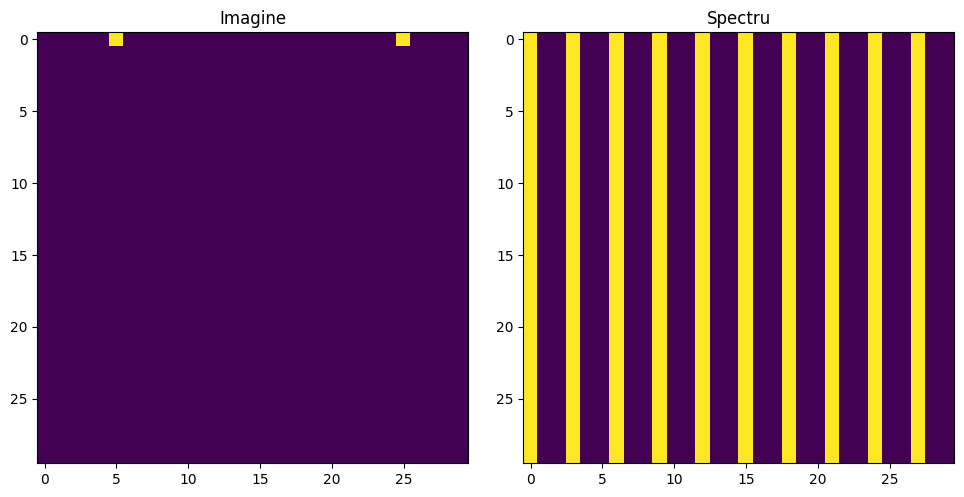

In [145]:
dim = 30
Y = np.zeros((dim,dim))
Y[0][5] = Y[0][dim-5] = 1
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Imagine')
plt.imshow(Y)

plt.subplot(1,2,2)
plt.title('Spectru')
spectru = np.fft.fft2(Y)
plt.imshow(np.abs(spectru))
plt.tight_layout(pad = 2)
plt.savefig("grafice/ex1_c.pdf", format="pdf")
plt.savefig("grafice/ex1_c.png", format="png")
plt.show()

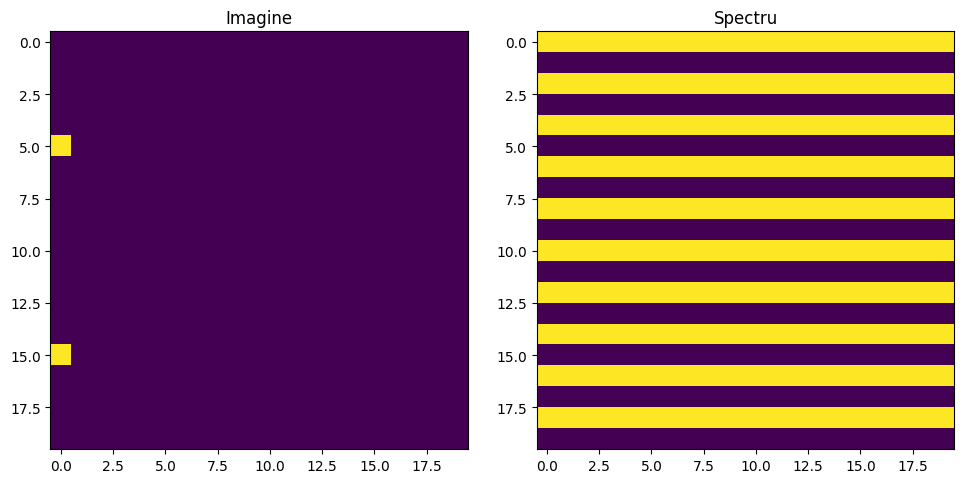

In [146]:
dim = 20
Y = np.zeros((dim,dim))
Y[5][0] = Y[dim-5][0] = 1
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Imagine')
plt.imshow(Y)

plt.subplot(1,2,2)
plt.title('Spectru')
spectru = np.fft.fft2(Y)
plt.imshow(np.abs(spectru))
plt.tight_layout(pad = 2)
plt.savefig("grafice/ex1_d.pdf", format="pdf")
plt.savefig("grafice/ex1_d.png", format="png")
plt.show()

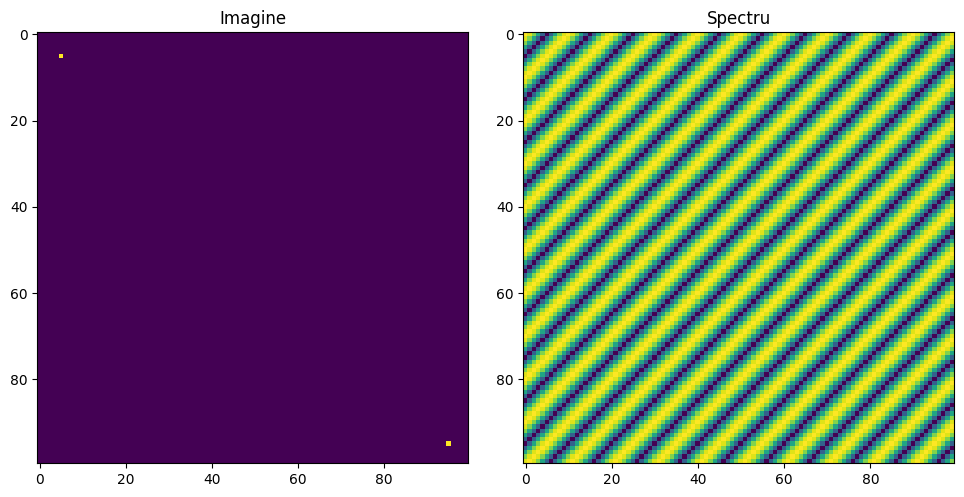

In [147]:
dim = 100
Y = np.zeros((dim,dim))
Y[5][5] = Y[dim-5][dim-5] = 1
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Imagine')
plt.imshow(Y)
plt.subplot(1,2,2)
plt.title('Spectru')
spectru = np.fft.fft2(Y)
plt.imshow(np.abs(spectru))
plt.tight_layout(pad = 2)
plt.savefig("grafice/ex1_e.pdf", format="pdf")
plt.savefig("grafice/ex1_e.png", format="png")
plt.show()


2. Comprimați imaginea cu ratonul de mai sus prin atenuarea frecvențelor înalte până la un prag SNR autoimpus.


C:\Users\Katherine\AppData\Local\Temp\ipykernel_27520\1215908870.py:25: RuntimeWarning: divide by zero encountered in log10
  axes[i+1,1].imshow(20*np.log10(abs(Y_c)))


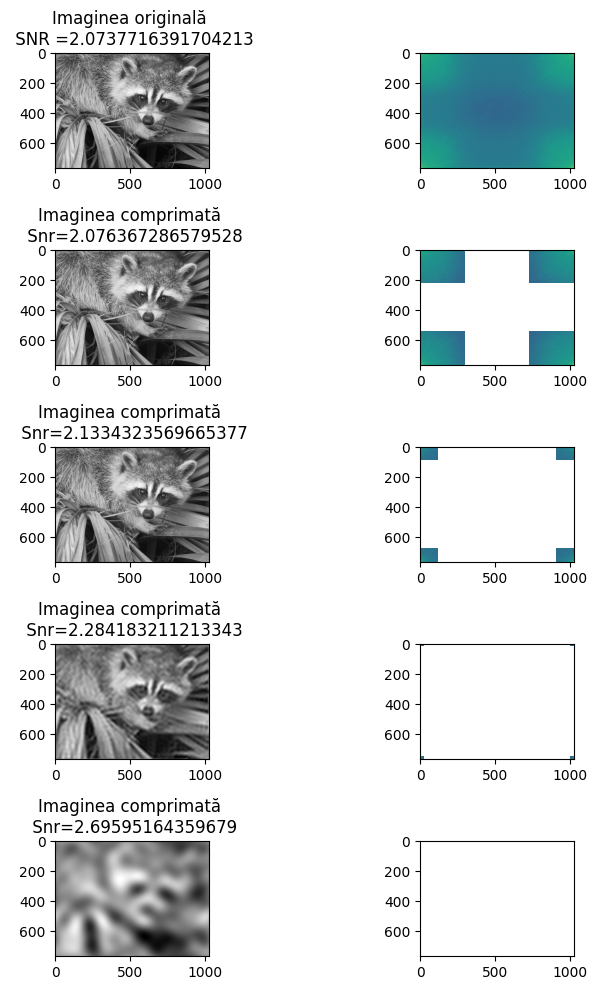

In [148]:
def snr(img):
    SNR = np.mean(img)/np.std(img)
    return SNR
 
X = misc.face(gray=True)
Y = np.fft.fft2(X)
r, c = X.shape

fig, axes = plt.subplots(5, 2, figsize=(8, 10))
axes[0,0].set_title(f'Imaginea originală \n SNR ={snr(X)}')
axes[0,0].imshow(X, cmap=plt.cm.gray)
axes[0,1].imshow(20*np.log10(abs(Y)))


fs_cut = [0.3,1/8,1/32,1/128]
for i,f_cut in enumerate(fs_cut):
    Y_c = Y.copy()   
    Y_c[int(r*f_cut):int(r*(1-f_cut))] = 0
    Y_c[:, int(c*f_cut):int(c*(1-f_cut))] = 0
    X_compressed = np.fft.ifft2(Y_c).real
    
    axes[i+1,0].set_title(f'Imaginea comprimată \n Snr={snr(X_compressed)}')
    axes[i+1,0].imshow(X_compressed, cmap=plt.cm.gray)
    axes[i+1,1].imshow(20*np.log10(abs(Y_c)))
    

plt.tight_layout()
plt.savefig("grafice/ex2.pdf", format="pdf")
plt.savefig("grafice/ex2.png", format="png")
plt.show()


3. Eliminați zgomotul adăugat la imaginea cu ratonul produsă mai sus. Prezentați raportul SNR înainte și după.


C:\Users\Katherine\AppData\Local\Temp\ipykernel_27520\4174852155.py:30: RuntimeWarning: divide by zero encountered in log10
  axes[i+1,1].imshow(20*np.log10(abs(Y_c)))


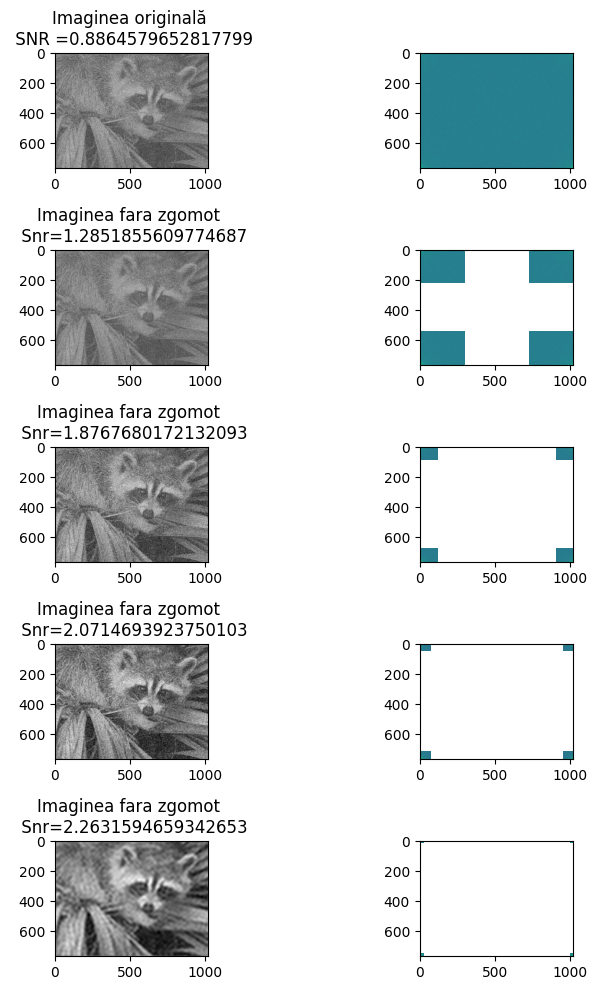

In [149]:
def snr(img):
    SNR = np.mean(img)/np.std(img)
    return SNR
 
X = misc.face(gray=True)

pixel_noise = 200

noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise
Y = np.fft.fft2(X_noisy)
r, c = X_noisy.shape

fs_cut = [0.3,1/8,1/13,1/32]
n = len(fs_cut)+1

fig, axes = plt.subplots(n, 2, figsize=(8, 10))
axes[0,0].set_title(f'Imaginea originală \n SNR ={snr(X_noisy)}')
axes[0,0].imshow(X_noisy, cmap=plt.cm.gray)
axes[0,1].imshow(20*np.log10(abs(Y)))

for i,f_cut in enumerate(fs_cut):
    Y_c = Y.copy()   
    Y_c[int(r*f_cut):int(r*(1-f_cut))] = 0
    Y_c[:, int(c*f_cut):int(c*(1-f_cut))] = 0
    X_compressed = np.fft.ifft2(Y_c).real
    
    axes[i+1,0].set_title(f'Imaginea fara zgomot \n Snr={snr(X_compressed)}')
    axes[i+1,0].imshow(X_compressed, cmap=plt.cm.gray)
    axes[i+1,1].imshow(20*np.log10(abs(Y_c)))
    

plt.tight_layout()
plt.savefig("grafice/ex3.pdf", format="pdf")
plt.savefig("grafice/ex3.png", format="png")
plt.show()

